In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt 

array([71.16533506])

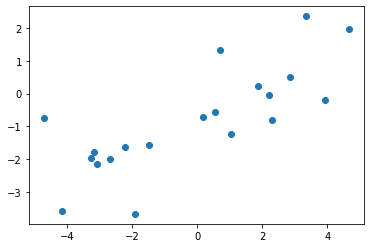

In [ ]:
np.random.seed(101)
N=20
X=np.random.random(N)*10 -5 
Y=0.5 * X - 1 + np.random.randn(N)
plt.scatter(X,Y)
np.correlate(X,Y)


In [ ]:
# create the model
model = nn.Linear(1,1)

In [ ]:
# loss function and optimizer
loss=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
# Reshape for (N,D=1) for train model
X=X.reshape(N,1)
Y=Y.reshape(N,1)
# torch use np.float 32 and torch tensor by defualt
pyTorchX=torch.from_numpy(X.astype(np.float32))
pyTorchY=torch.from_numpy(Y.astype(np.float32))

type(pyTorchX)

torch.Tensor

In [ ]:
 #Train the model 
n_epochs=30
losses = []
for i in range(n_epochs):
   model.train()
   #zero the parameter gradients for not accumulate
   optimizer.zero_grad()
   #forward pass 
   outputs=model(pyTorchX)
   error=loss(outputs,pyTorchY)
   losses.append(error.item())
   #backward 
   error.backward()
   optimizer.step()

   print(f'Epochs: {i+1}/{n_epochs} , Loss: {error.item()}')


Epochs: 1/30 , Loss: 3.507328748703003
Epochs: 2/30 , Loss: 2.5650086402893066
Epochs: 3/30 , Loss: 1.9829368591308594
Epochs: 4/30 , Loss: 1.6177482604980469
Epochs: 5/30 , Loss: 1.3865084648132324
Epochs: 6/30 , Loss: 1.239300012588501
Epochs: 7/30 , Loss: 1.145297884941101
Epochs: 8/30 , Loss: 1.0851666927337646
Epochs: 9/30 , Loss: 1.0466631650924683
Epochs: 10/30 , Loss: 1.0219948291778564
Epochs: 11/30 , Loss: 1.0061852931976318
Epochs: 12/30 , Loss: 0.9960511922836304
Epochs: 13/30 , Loss: 0.9895545840263367
Epochs: 14/30 , Loss: 0.9853897094726562
Epochs: 15/30 , Loss: 0.9827194213867188
Epochs: 16/30 , Loss: 0.9810073971748352
Epochs: 17/30 , Loss: 0.9799095988273621
Epochs: 18/30 , Loss: 0.9792059659957886
Epochs: 19/30 , Loss: 0.9787546992301941
Epochs: 20/30 , Loss: 0.9784654378890991
Epochs: 21/30 , Loss: 0.9782799482345581
Epochs: 22/30 , Loss: 0.9781610369682312
Epochs: 23/30 , Loss: 0.9780848622322083
Epochs: 24/30 , Loss: 0.9780359268188477
Epochs: 25/30 , Loss: 0.9780

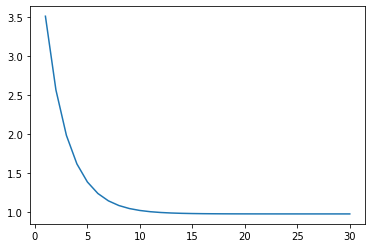

In [ ]:
plt.plot(range(1,n_epochs+1),losses)

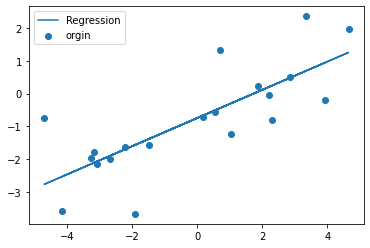

In [ ]:
predicted = model(pyTorchX).detach().numpy()
plt.plot(X,predicted,label="Regression")
plt.scatter(X,Y,label="orgin")
plt.legend()
plt.show()

In [ ]:
# for retrive paramter
weight=model.weight.data.numpy()
bias = model.bias.data.numpy()
# an other way
# weight=model.weight.item()
# bias = model.bias.item()
print(weight,bias)

[[0.4297138]] [-0.74236685]


In [ ]:
for i in model.parameters():
  print(i.item())

0.42971378564834595
-0.7423668503761292


# PyTorch Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# make dataset
torch.manual_seed(42)
N=1000
X=np.random.random((N,2))*6 - 3 
y=np.cos(2*X[:,0]) + np.cos(3*X[:,1])
X


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y);

In [ ]:
model=nn.Sequential(
    nn.Linear(2,100),
    nn.ReLU(),
    nn.Linear(100,1)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32)).reshape(-1,1)

In [ ]:
#An epoch is one Loop through the data ...
n_epochs =500 #HyperParameters 
Train_loss=[]
# 0. Loop through the data
for epoch in range(n_epochs):
  # set the model to training mode
  model.train() # set paramter to require gradient
  # 1. forward pass
  y_pred=model(X_train)
  # 2. Calculate Loss
  Loss=loss_fn(y_pred,y_train)
  Train_loss.append(Loss.item())
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4.perform backpropagation on the loss 
  Loss.backward()
  # 5.Step the optimizer 
  optimizer.step()
  if epoch % 100 ==0:
    print(f'Epoch:{epoch} | train loss:{Loss}') 

In [ ]:
plt.plot(Train_loss)

In [ ]:
??torchvision.datasets.MNIST